In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt 
from scipy.stats import rankdata
%matplotlib inline  

In [2]:
plant_data = pd.read_csv('plants_data_csv.csv')

In [3]:
plant_data.head()

,NAME,GROWTH PERIOD,MEDICINAL,FRUIT/VEGETABLE,COST OF SEED AND FERTILIZERS,HUMAN EFFORT,CLIMATE SUITABLITY,SOIL SUITABILITY,MARKET VALUE OF PRODUCE,AREA
0,A1,7,0,1,7403,80,1,0,9258,4
1,A2,16,1,0,3391,90,1,0,9619,2
2,A3,6,1,0,1162,3,1,1,5989,4
3,A4,7,1,1,526,31,0,1,5911,3
4,A5,2,1,1,7943,16,0,0,8219,5


In [4]:
population = pd.read_csv('population.csv')
population.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0,0,0,1,1,0,1,0,0,1,...,2,1,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1,...,2,1,0,0,1,0,1,0,0,1
2,0,1,1,1,0,0,0,1,1,0,...,1,1,0,1,1,1,1,1,1,0
3,1,1,1,0,0,1,1,0,0,1,...,2,1,1,1,0,0,0,1,0,1
4,1,0,1,0,0,1,1,0,1,0,...,2,0,0,1,1,0,0,1,1,1


In [5]:
def mutation( chromosome):
    allel = random.randrange(0,30,1)
    chromosome[allel] = random.randrange(0,3,1)
    return chromosome

In [70]:
def crossover( parent1, parent2):
    exchange_pt = random.randrange(24,30,1)
    #print exchange_pt
    #print parent1
    b = parent1[exchange_pt:30].copy()
    c = parent2[exchange_pt :30].copy()
    #print b
    #print c
    parent1[exchange_pt:30] = c
    parent2[exchange_pt:30] = b
    return (parent1, parent2)

In [71]:
def fitness1_calculation(population):
    fitness = []
    for chrom in range(len(population.index)): 
        fitness_value = 0.0
        #print chrom
        for i in range(30):
            fitness_value += population.iloc[chrom][i]*(plant_data['MARKET VALUE OF PRODUCE'][i]- plant_data['COST OF SEED AND FERTILIZERS'][i])
            #print type(fitness_value)
        fitness.append(fitness_value)
    return fitness    

In [72]:
print(fitness1_calculation(population))

[2840.0, 28450.0, -6047.0, -3096.0, 20787.0, 20424.0, 14357.0, -16199.0, 32643.0, 22303.0, 9539.0, 32201.0, 16594.0, -9622.0, 14939.0, -1294.0, 7222.0, -5916.0, -1535.0, 7673.0, 15646.0, -10232.0, 15952.0, -16367.0, 9044.0, -19104.0, 15267.0, 12394.0, 22162.0, 17208.0, 15343.0, -589.0, -594.0, 3762.0, 2301.0, 6635.0, -13122.0, -10332.0, 16432.0, 14553.0, 13891.0, -2072.0, 1804.0, -2138.0, 22778.0, 13413.0, 11570.0, -3642.0, 5164.0, 8786.0]


In [73]:
def fitness2_calculation(population):
    fitness = []
    for chrom in range(len(population.index)):
        fitness_value = 0.0
        for i in range(30):
            x = population.iloc[chrom][i]*(plant_data['GROWTH PERIOD'][i] + 12* plant_data['SOIL SUITABILITY'][i] 
                                      + 12*plant_data['CLIMATE SUITABLITY'][i] )
            fitness_value += math.exp(-x)
        fitness.append(fitness_value)
    return fitness 

In [74]:
print(fitness2_calculation(population))

[12.000461288090529, 6.135673151093037, 15.135670761380718, 9.135464992514722, 7.135467273707655, 15.13546497063122, 13.135670920918828, 5.000002799429696, 11.00012379450365, 15.135337590886634, 14.000000266741136, 12.135458924036435, 15.135337810073795, 16.0003355864471, 12.135461225723743, 11.000008550198077, 13.135796576851947, 13.000467389789646, 17.13545875555795, 11.018659799765206, 14.000000139605216, 15.135794218465438, 12.135458859264183, 13.135341427457734, 10.135670901119658, 13.000459052807708, 10.135467391292677, 17.000467389828792, 9.000123697463161, 14.13533770415304, 19.000006191216603, 14.000337741125747, 14.000006426955547, 15.000335632830986, 14.135670927038417, 13.0001234782031, 14.00046735069307, 16.000000175815693, 10.135671003294139, 15.135337662031219, 13.000123795214975, 15.13533544945268, 11.135343857993435, 15.135341469447205, 13.000123575227146, 13.13567304895894, 18.135343729188946, 17.000006150381118, 18.00046118080104, 11.000125691327261]


In [75]:
def sum_of_weighted_ratios(fitness1, fitness2):
    min_f1 = min(fitness1)
    max_f1 = max(fitness1)
    min_f2 = min(fitness2)
    max_f2 = max(fitness2)
    fitness1 = (fitness1-min_f1)/(max_f1-min_f1)
    fitness2 = (fitness2-min_f2)/(max_f2-min_f2)
    fitness = rankdata(fitness1)+rankdata(fitness2)
    return fitness

In [76]:
fitness = sum_of_weighted_ratios(np.array(fitness1_calculation(population)), np.array(fitness2_calculation(population)))

In [77]:
rankdata(fitness)

array([  8.5,  24.5,  22.5,   2. ,  16.5,  49. ,  36. ,   1. ,  37. ,
        48. ,  34.5,  39.5,  47. ,  26.5,  29. ,   4. ,  24.5,   6.5,
        38. ,  11.5,  39.5,  19.5,  31. ,   5. ,   8.5,   3. ,  14. ,
        45. ,  22.5,  44. ,  50. ,  16.5,  15. ,  32.5,  29. ,  13. ,
        10. ,  19.5,  19.5,  43. ,  29. ,  19.5,   6.5,  26.5,  41. ,
        34.5,  46. ,  32.5,  42. ,  11.5])

In [78]:
def objective(population):
    fitness1 = np.array(fitness1_calculation(population))
    fitness2 = np.array(fitness2_calculation(population))
    cost = sum_of_weighted_ratios(fitness1 , fitness2)
    return cost , rankdata(fitness)

In [79]:
population['Cost'] , population['Objective'] = objective(population)
population.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,Cost,Objective
0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,34.0,8.5
1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,50.0,24.5
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,49.0,22.5
3,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,16.0,2.0
4,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,47.0,16.5


In [80]:
def survivor_selection(population, max_area):
    isDrop = []
    for chrom in range(len(population.index)):
        area = 0.0
        for i in range(30):
            area += population.iloc[chrom][i]*plant_data['AREA'][i]
        if area > max_area:
            isDrop.append(True)
        else:
            isDrop.append(False)
    population = population.drop(population[isDrop].index)
    return population    

In [81]:
print len(population)

50


In [82]:
def tournament( rank , participants):
    return min(rank[participants])

In [83]:
def sampling( size, k):
    x = random.sample(range(0, size), k)
    part = np.full((size), False)
    for i in x:
        part[i] = True
    return part    

In [84]:
part = sampling(50,3)
print tournament(population.iloc[:,31].values, part.astype(bool))

11.5


In [88]:
pop_size = 50
cost_values = []
avg_cost = []
for i in range(500):
    if pop_size < 20:
        break
    part = sampling(pop_size,10)
    parent1 = int(tournament(population.iloc[:,31].values, part.astype(bool)))-1
    part = sampling(pop_size,10)
    parent2 = int(tournament(population.iloc[:,31].values, part.astype(bool)))-1
    #print parent1, parent2
    #print population.shape
    pc = sampling(10,7)
    if parent1 != parent2 and pc[4] == 1 :
        population.iloc[parent1, 0:30], population.iloc[parent2,0:30] = crossover(population.iloc[parent1, 0:30].copy(), population.iloc[parent2,0:30].copy())
    pm = sampling(10,1)
    if pm[4] == 1:
        population.iloc[parent1, 0:30] = mutation(population.iloc[parent1,0:30])
        population.iloc[parent2, 0:30] = mutation(population.iloc[parent2, 0:30])
    population = survivor_selection(population, 100)    
    population['Cost'] , population['Objective'] = objective(population)
    temp = float(population[population['Objective'] == 1]['Cost'].values)
    cost_values.append(temp)
    avg_cost.append((population['Cost'].sum())/len(population))
    pop_size = len(population)

In [89]:
cost_values

[16.0,
 16.0,
 16.0,
 15.0,
 15.0,
 15.0,
 15.0,
 16.0,
 16.0,
 16.0,
 17.0,
 17.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 6.0,
 6.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 13.0,
 15.0,
 15.0,
 15.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 14.0,
 14.0,
 15.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 9.0,
 9.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 17.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 17.0,
 17.0,
 17.0,
 10.0,
 10.0,
 10.0,
 9.0,
 9.0,
 9.0,
 9.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 

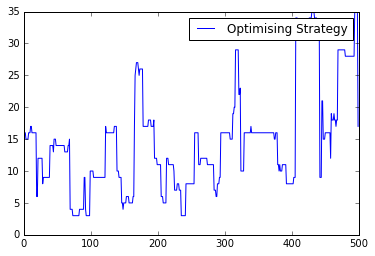

In [90]:
plt.plot(cost_values, label = "Optimising Strategy") 
plt.legend() 
plt.show()

In [91]:
population[population['Objective'] == 1][0:30]

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,Cost,Objective
7,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,17.0,1.0
